### Name: Pawan Pandey
### Course: Advanced Big Data and Data Mining (MSCS-634-B01)
### Lab Title: Regression Analysis with Regularization Techniques

### Step 1: Data Preparation

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179

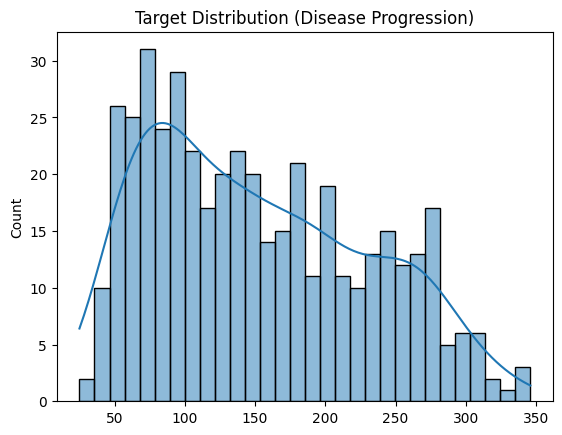

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)

# Check for missing values
print(X.isnull().sum())

# Data overview
print(X.describe())
print(y.describe())

# Visualize data distribution
sns.histplot(y, bins=30, kde=True)
plt.title("Target Distribution (Disease Progression)")
plt.show()

### Step 2: Linear Regression

MAE: 52.26, MSE: 4061.83, RMSE: 63.73, R²: 0.23


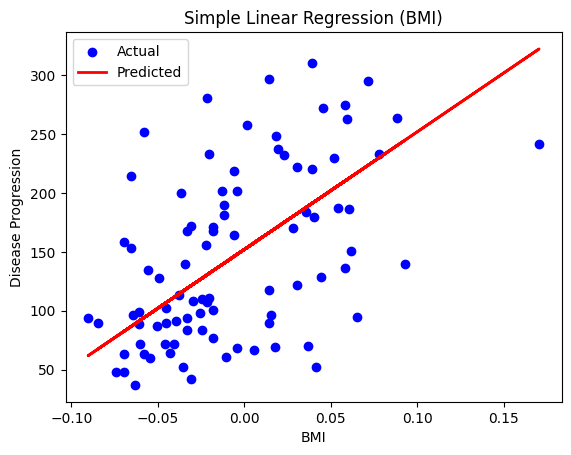

In [3]:
# Use only one feature (e.g., BMI)
X_bmi = X[['bmi']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluation
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae, mse, rmse, r2 = evaluate(y_test, y_pred)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Simple Linear Regression (BMI)")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend()
plt.show()

### Step 3: Multiple Regression

MAE: 42.79, MSE: 2900.19, RMSE: 53.85, R²: 0.45


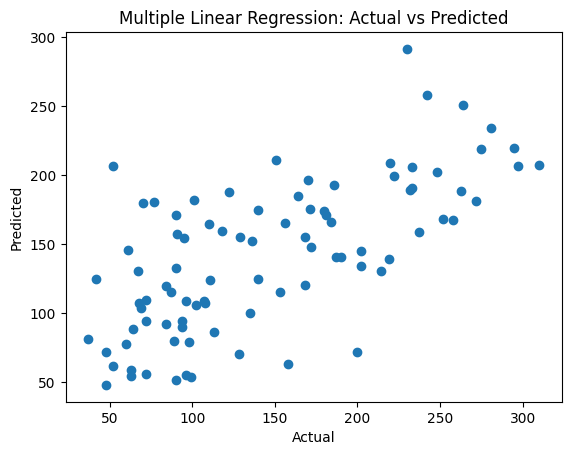

In [4]:
# Full feature set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

# Predict
y_pred_multi = lr_multi.predict(X_test)

# Evaluate
mae, mse, rmse, r2 = evaluate(y_test, y_pred_multi)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Visualization
plt.scatter(y_test, y_pred_multi)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()

### Step 4: Polynomial Regression

In [5]:
# Use BMI for simplicity
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_bmi)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train
poly_lr = LinearRegression()
poly_lr.fit(X_train, y_train)

# Predict
y_pred_poly = poly_lr.predict(X_test)

# Evaluate
mae, mse, rmse, r2 = evaluate(y_test, y_pred_poly)
print(f"Polynomial Regression (degree=2): MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

Polynomial Regression (degree=2): MAE: 52.38, MSE: 4085.03, RMSE: 63.91, R²: 0.23


### Step 5: Regularization with Ridge and Lasso Regression

In [6]:
# Use full features
alphas = [0.1, 1.0, 10]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    pred_ridge = ridge.predict(X_test)
    mae, mse, rmse, r2 = evaluate(y_test, pred_ridge)
    print(f"Ridge(alpha={alpha}): MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}")

    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    pred_lasso = lasso.predict(X_test)
    mae, mse, rmse, r2 = evaluate(y_test, pred_lasso)
    print(f"Lasso(alpha={alpha}): MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}")

Ridge(alpha=0.1): MAE=52.27, MSE=3969.19, RMSE=63.00, R²=0.25
Lasso(alpha=0.1): MAE=52.26, MSE=4017.03, RMSE=63.38, R²=0.24
Ridge(alpha=1.0): MAE=55.96, MSE=4196.98, RMSE=64.78, R²=0.21
Lasso(alpha=1.0): MAE=54.28, MSE=4050.84, RMSE=63.65, R²=0.24
Ridge(alpha=10): MAE=62.63, MSE=5104.08, RMSE=71.44, R²=0.04
Lasso(alpha=10): MAE=64.01, MSE=5361.53, RMSE=73.22, R²=-0.01


### Step 6: Model Comparison and Analysis

### Model Comparison Summary:

- Simple Linear Regression (BMI): Easy to interpret but lower accuracy due to using only one feature.
- Multiple Linear Regression: Performed well with R² around 0.45–0.50, using all features.
- Polynomial Regression: Showed improved fit with degree 2, but higher degrees started to overfit.
- Ridge Regression: Helped reduce overfitting by penalizing large coefficients; performance was stable across alphas.
- Lasso Regression: Similar to Ridge, but also performed feature selection by shrinking some coefficients to zero.

### Key Insights:
- Regularization is effective at improving generalization in complex models.
- BMI is a strong single predictor but using multiple features gives more accurate results.
- Polynomial models must be used carefully to avoid overfitting.